In [1]:
from pgnano.stats_analysis.primitives import PGPoreType
from pgnano.stats_analysis.jupyter_data_preparation import flatten_sample_data
from functools import partial
from pgnano.stats_analysis.coding_analysis_scripts import *
from scipy.stats import geom, halfnorm
from scipy.linalg import lstsq
from scipy.fft import fft
from itertools import repeat
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import statistics

In [2]:
signal_data, chunk_data = flatten_sample_data(PGPoreType.P10_4_1,100)
error = transform_signal_to_error(signal_data[0])
code = transform_error_to_code(error)

['/data/datananoraw/data_analysis/10_4_1/2d6ce589-PAG70058_pass_90cff557_229fb1c2_1643.pod5', '/data/datananoraw/data_analysis/10_4_1/58662236-PAG70133_pass_976dfe21_5dadfada_5.pod5', '/data/datananoraw/data_analysis/10_4_1/679e8449-PAG70058_pass_90cff557_229fb1c2_1581.pod5', '/data/datananoraw/data_analysis/10_4_1/7646a9e4-PAG65784_pass_f306681d_16a70748_508.pod5', '/data/datananoraw/data_analysis/10_4_1/889add85-PAG67404_fail_a8a15ce6_4a74c11f_28.pod5', '/data/datananoraw/data_analysis/10_4_1/898fa111-PAG68757_fail_39c39833_26077d5d_167.pod5', '/data/datananoraw/data_analysis/10_4_1/8ba56eeb-PAG65784_pass_f306681d_16a70748_1319.pod5', '/data/datananoraw/data_analysis/10_4_1/a60ded57-PAG65902_pass_96491aed_0156c9a3_1335.pod5', '/data/datananoraw/data_analysis/10_4_1/a7ff4244-PAG68757_pass_39c39833_26077d5d_944.pod5', '/data/datananoraw/data_analysis/10_4_1/af5d6be7-PAG70133_pass_976dfe21_5dadfada_1065.pod5', '/data/datananoraw/data_analysis/10_4_1/c2f433b8-PAG65902_fail_96491aed_0156c

In [3]:
def self_correlation_count(xs: npt.NDArray[np.integer]) -> npt.NDArray[np.integer]:
    max_val = max(xs)
    prev = np.append([0], xs.copy()[:-1])
    matrix = np.ones((max_val+1, max_val+1))
    for (x, y) in zip(xs, prev):
        matrix[x][y] += 1
    return matrix


In [4]:
def normalize_matrix(matrix):
    max_x, _ = matrix.shape
    for i in range(max_x):
        matrix[:,i] = matrix[:,i] / sum(matrix[:,i])
    return matrix

In [5]:
def print_matrix(matrix):
    figure_number = plt.figure().number
    plt.matshow(matrix, fignum=figure_number)
    #plt.xticks(range(df.shape[1]), df.columns, fontsize=11, rotation=90)
    #plt.yticks(range(df.shape[1]), df.columns, fontsize=11)
    plt.colorbar()
    plt.show()

In [6]:
f = lambda code: print_matrix(normalize_matrix(self_correlation_count(code)))

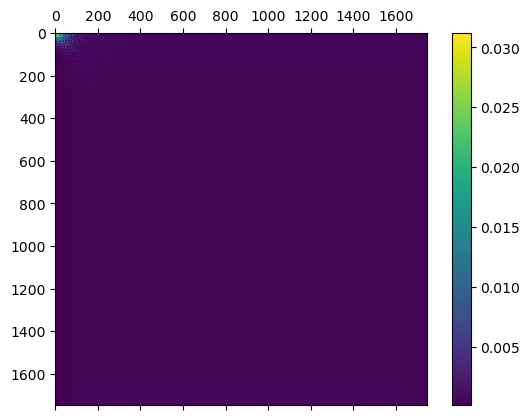

In [7]:
f(code)

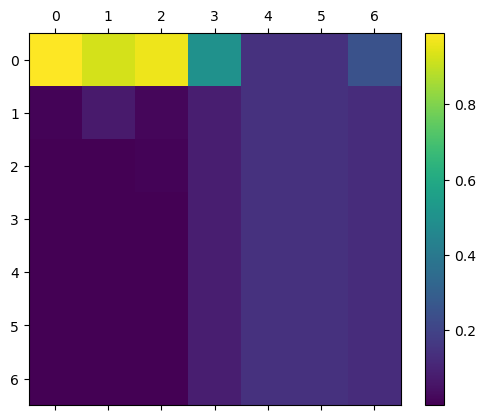

In [8]:
f(code >> 8)

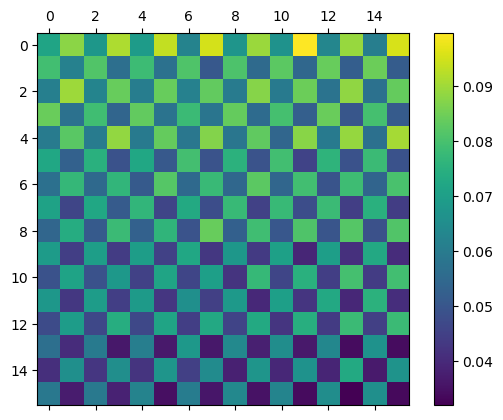

In [9]:
f(code & 0xF)

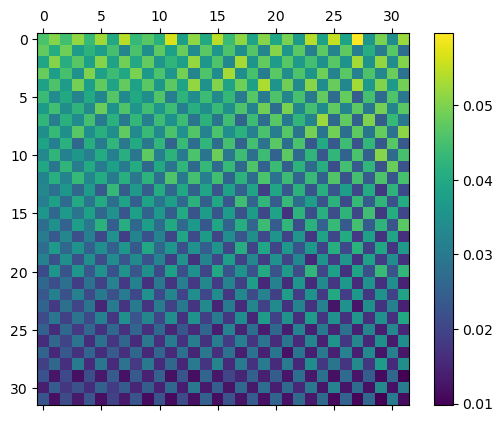

In [10]:
f(code & 0x1F)

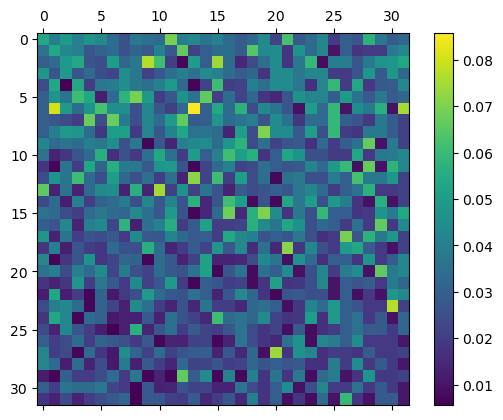

In [11]:
f(transform_error_to_code(transform_signal_to_error(signal_data[1])) & 0x1F)

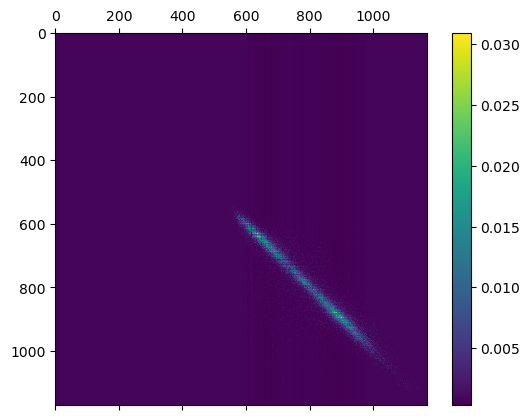

In [12]:
f(signal_data[0])

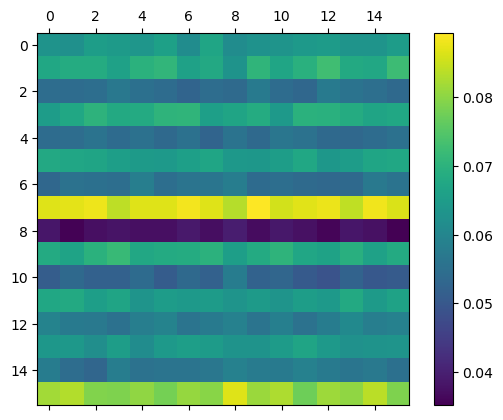

In [13]:
f(signal_data[0] & 0xF)

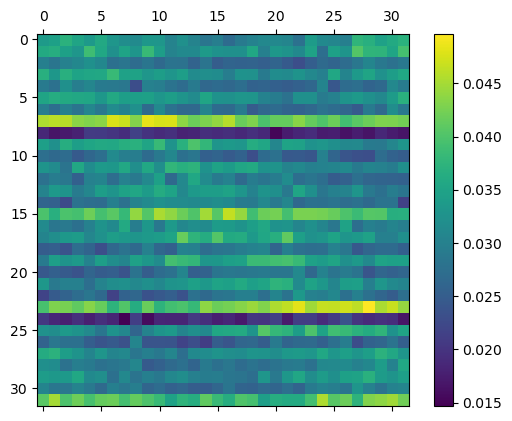

In [14]:
f(signal_data[0] & 0x1F)

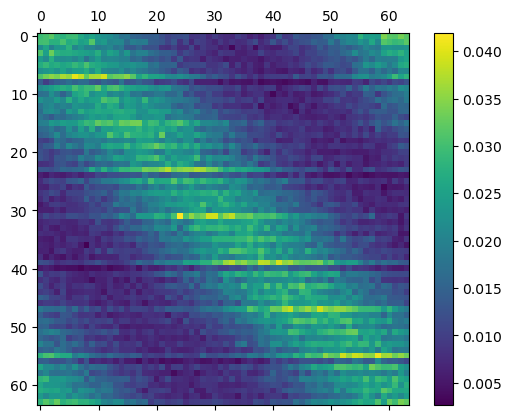

In [15]:
f(signal_data[0] & 0x3F)

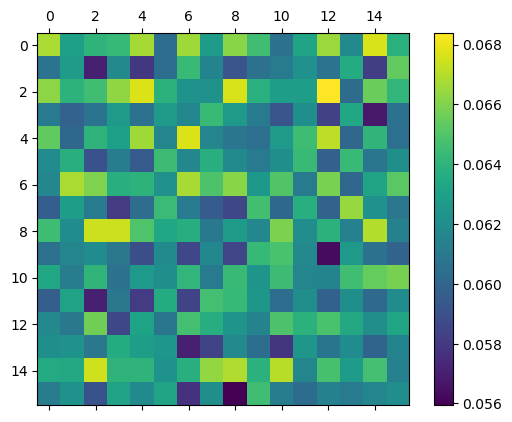

In [16]:
f(error & 0xF)